In [18]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
df.describe(include = 'O')

,animal name
count,101
unique,100
top,frog
freq,2


In [6]:
df[df['animal name'] == 'frog']

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [7]:
df['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [8]:
df[df.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [9]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [10]:
x = ['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'tail', 'domestic', 'catsize']

In [11]:
# Unique value count for each column

In [13]:
for i in x: 
    print(i)
    y = df[i].value_counts()
    print(y)
    print('--------------------')

hair
0    58
1    43
Name: hair, dtype: int64
--------------------
feathers
0    81
1    20
Name: feathers, dtype: int64
--------------------
eggs
1    59
0    42
Name: eggs, dtype: int64
--------------------
milk
0    60
1    41
Name: milk, dtype: int64
--------------------
airborne
0    77
1    24
Name: airborne, dtype: int64
--------------------
aquatic
0    65
1    36
Name: aquatic, dtype: int64
--------------------
predator
1    56
0    45
Name: predator, dtype: int64
--------------------
toothed
1    61
0    40
Name: toothed, dtype: int64
--------------------
backbone
1    83
0    18
Name: backbone, dtype: int64
--------------------
breathes
1    80
0    21
Name: breathes, dtype: int64
--------------------
venomous
0    93
1     8
Name: venomous, dtype: int64
--------------------
fins
0    84
1    17
Name: fins, dtype: int64
--------------------
tail
1    75
0    26
Name: tail, dtype: int64
--------------------
domestic
0    88
1    13
Name: domestic, dtype: int64
---------------

In [14]:
# Bar plots of above value

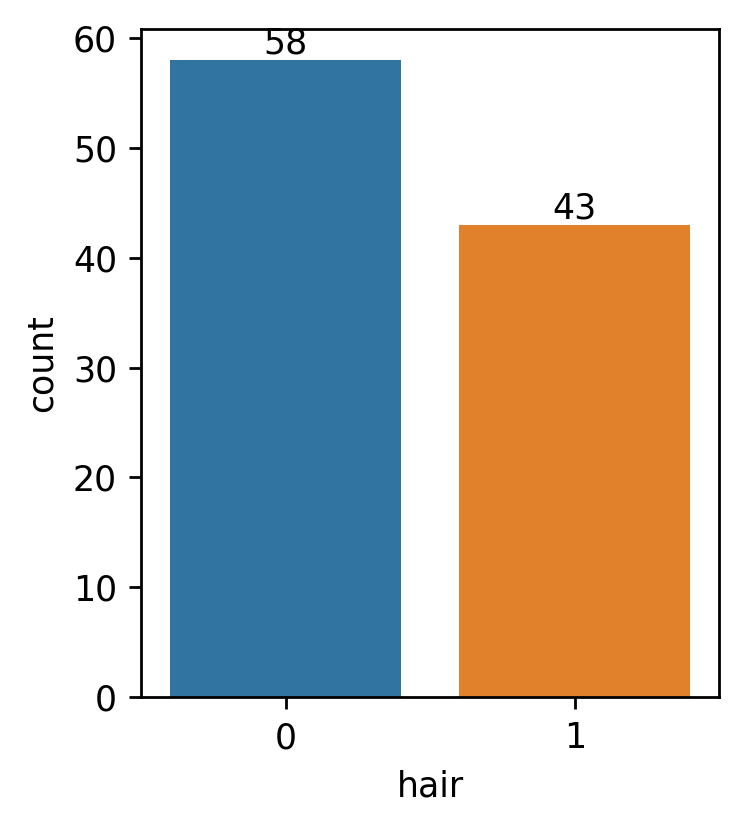

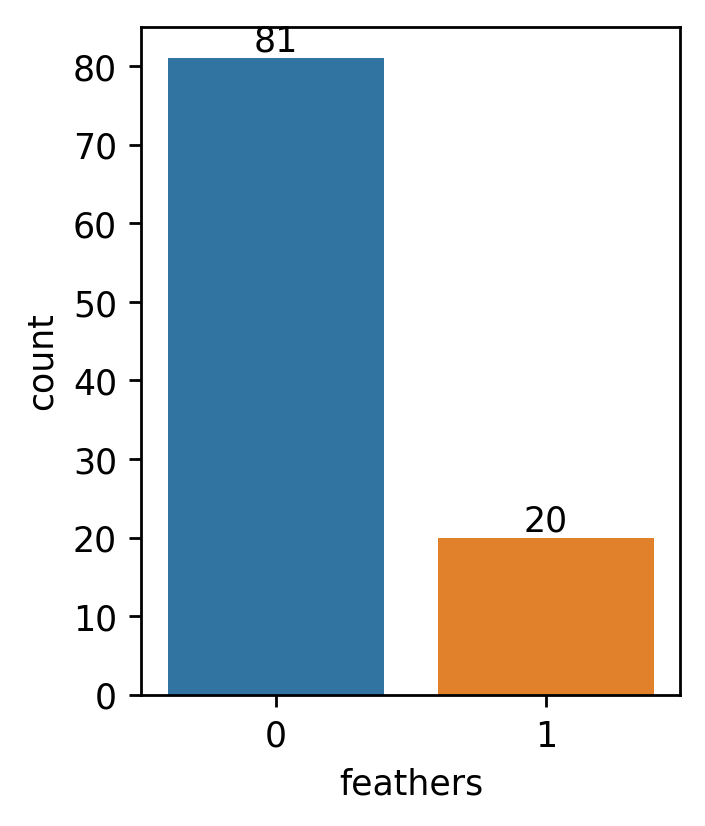

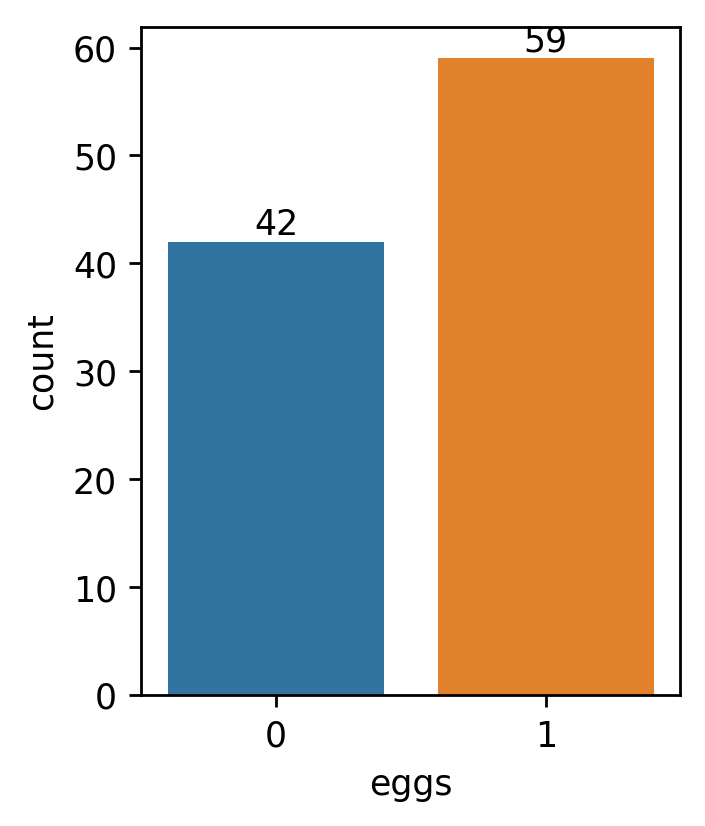

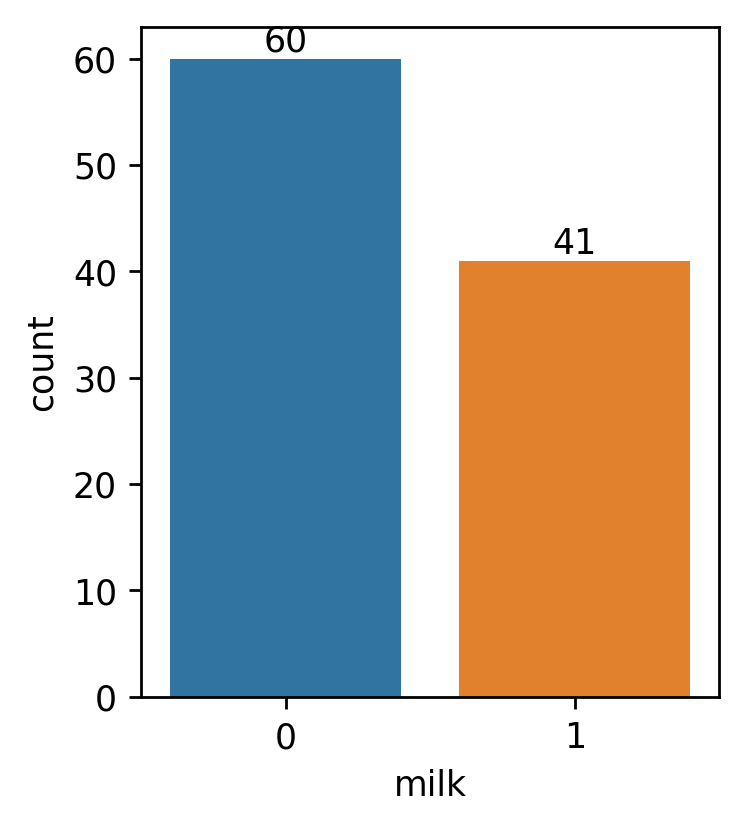

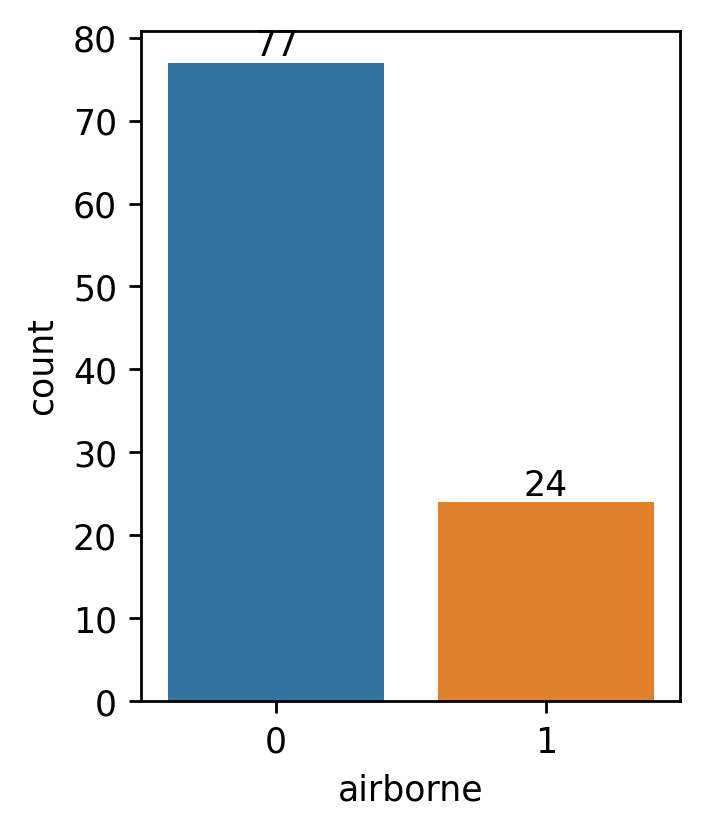

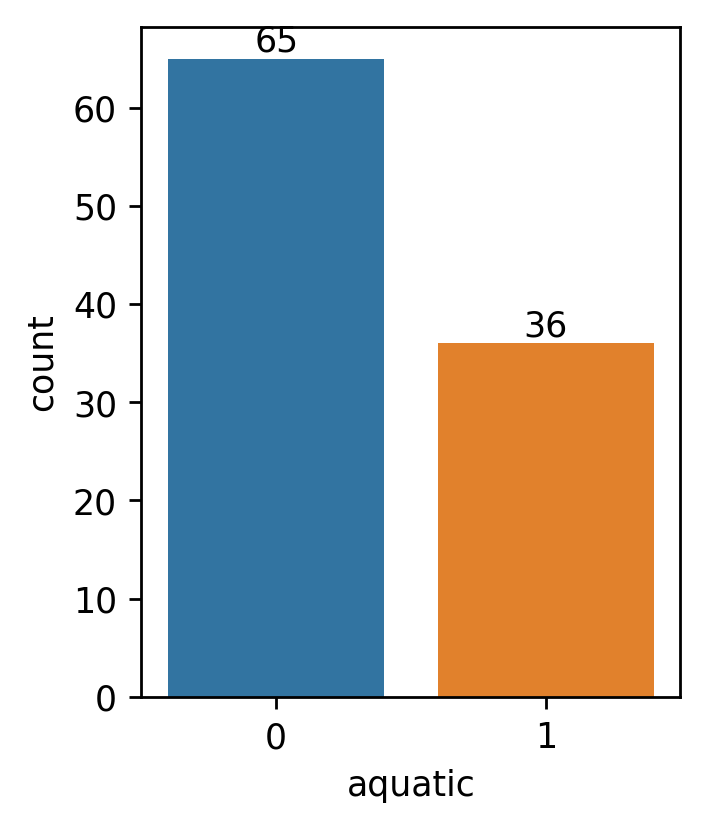

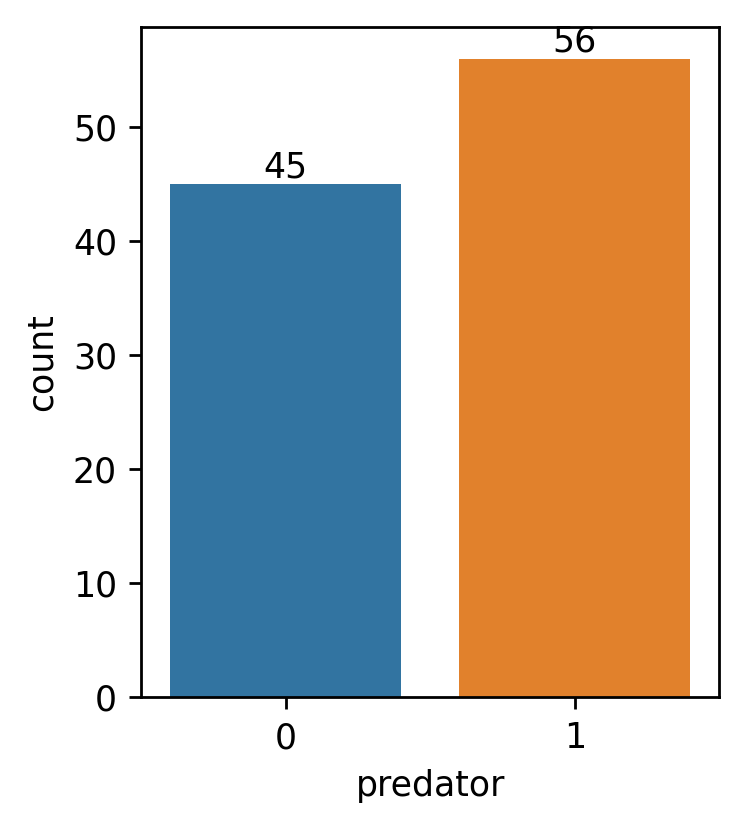

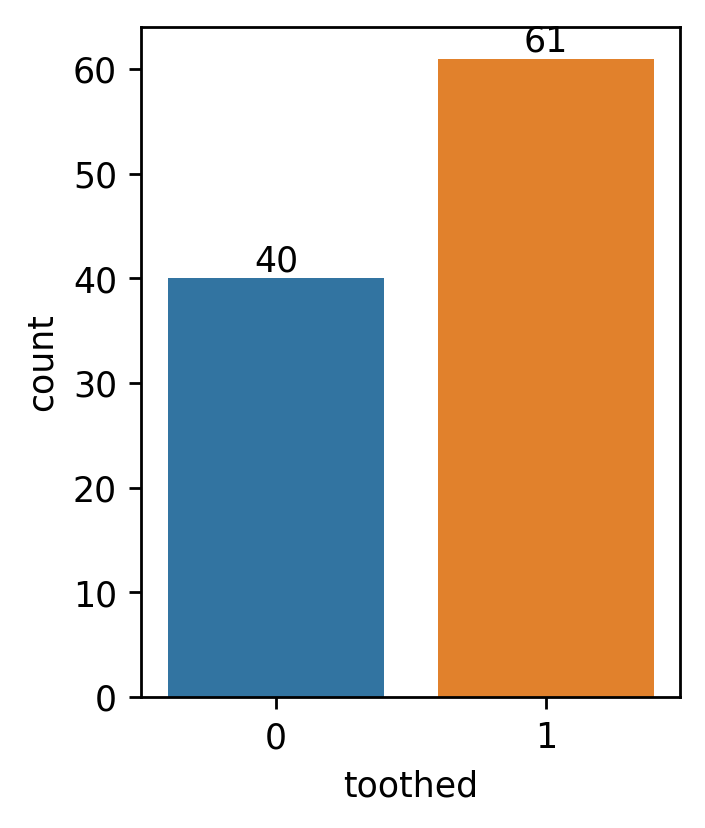

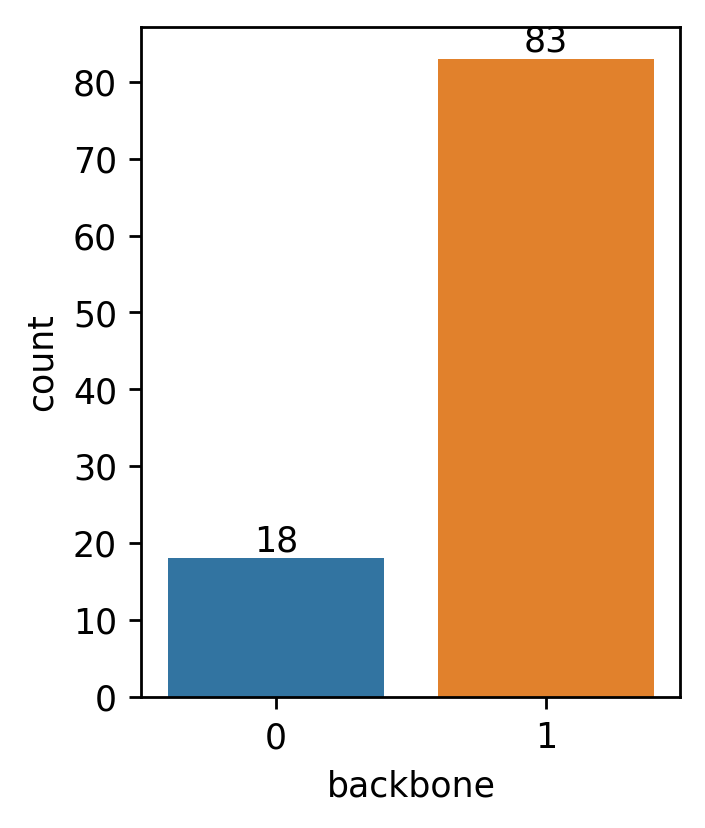

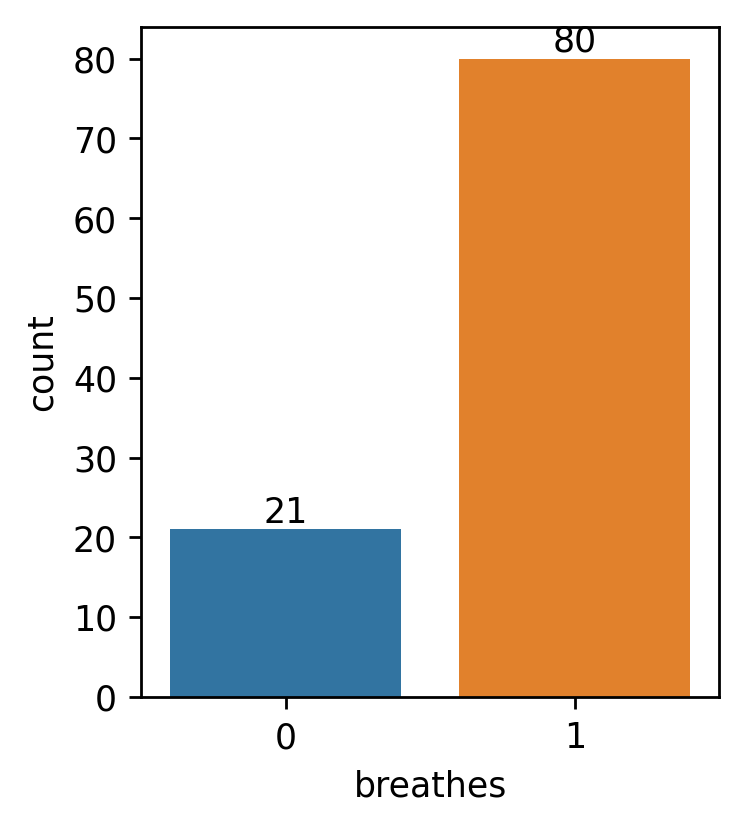

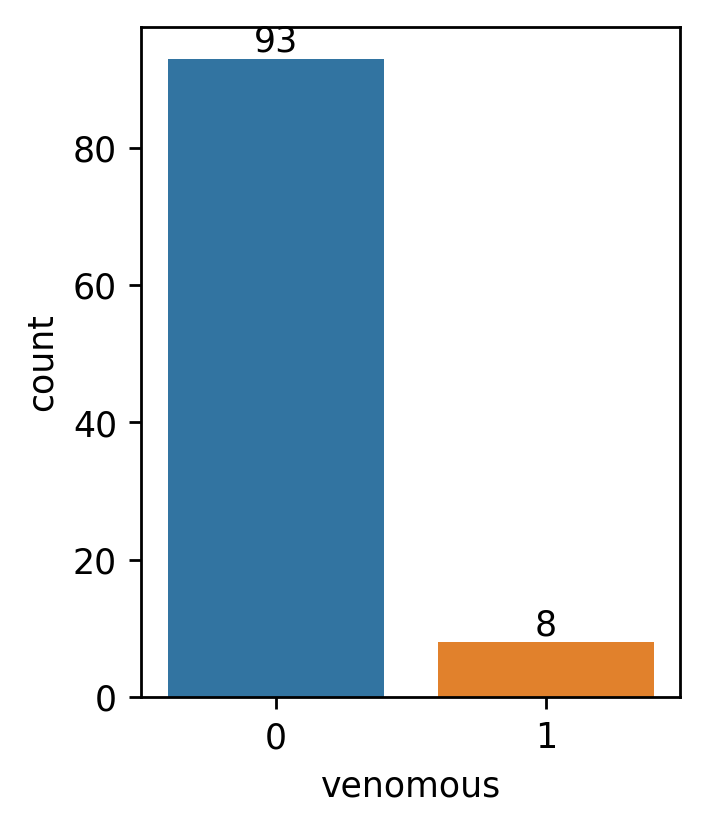

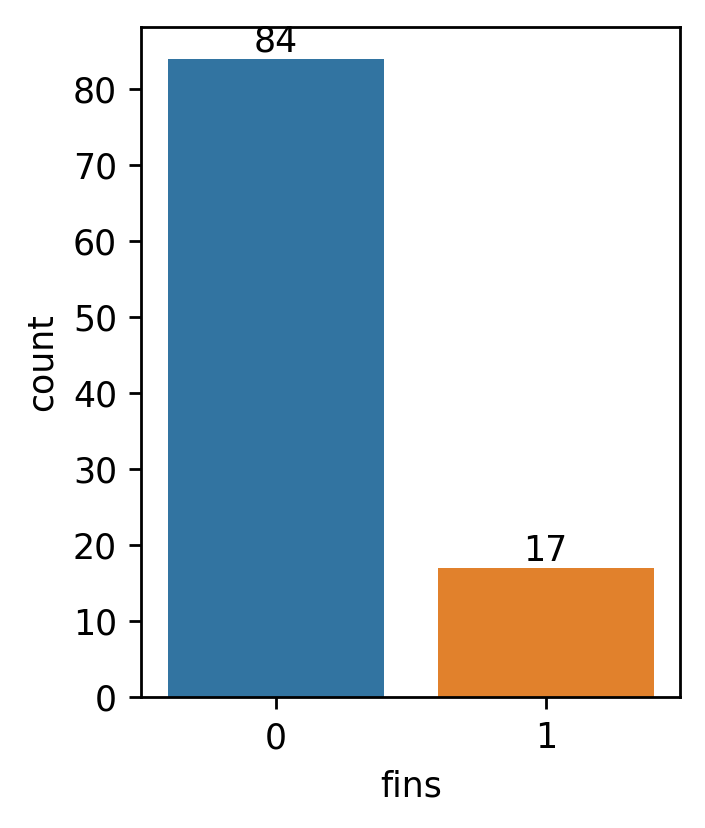

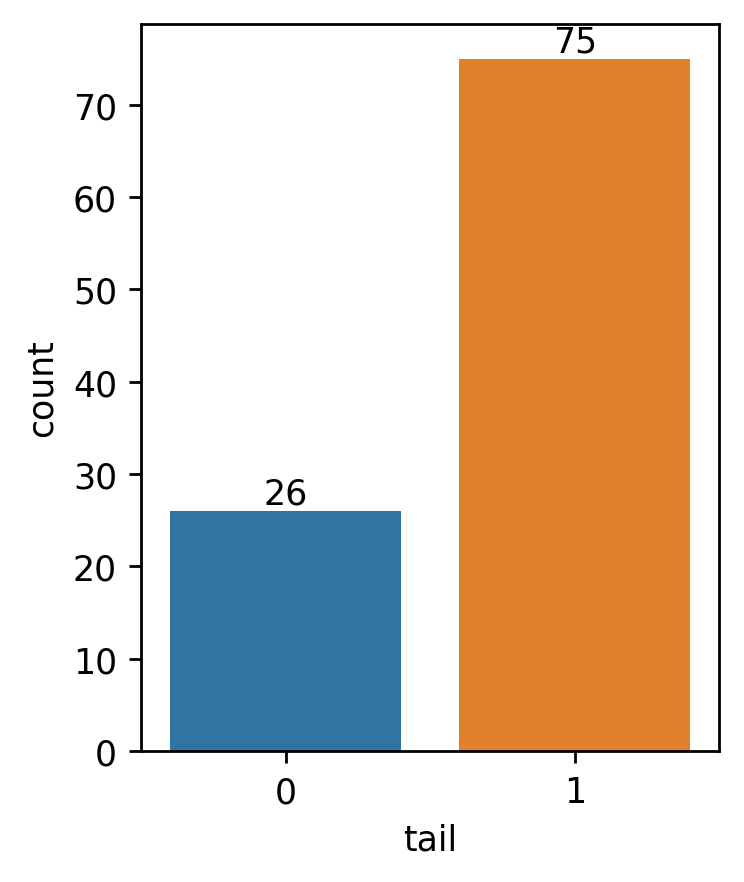

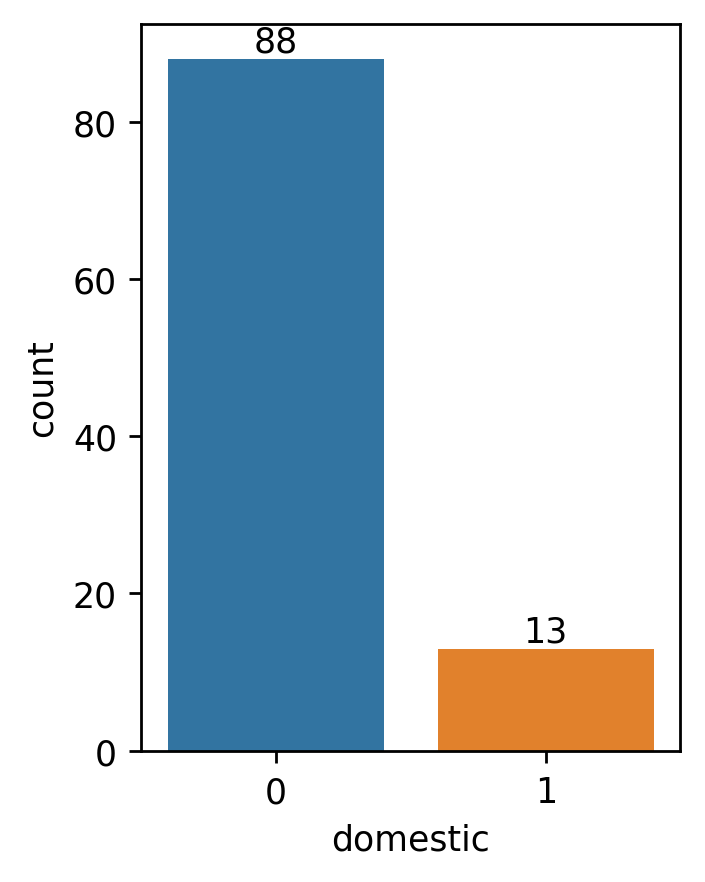

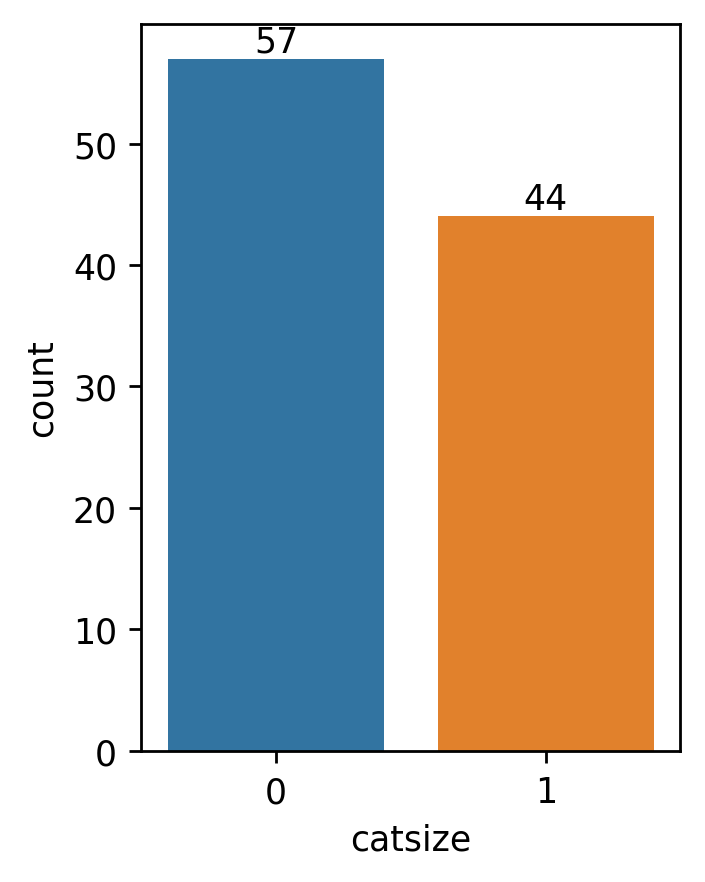

In [26]:
n = 1
for i in x:
    plt.figure(figsize = (8,16))
    plt.subplot(5,3,n)
    ax = sns.countplot(i, data = df);
    ax.bar_label(ax.containers[0]);
    plt.xlabel(i)
    plt.ylabel('count')
    plt.tight_layout()
    n = n + 1 

In [27]:
# Unique values present in legs column

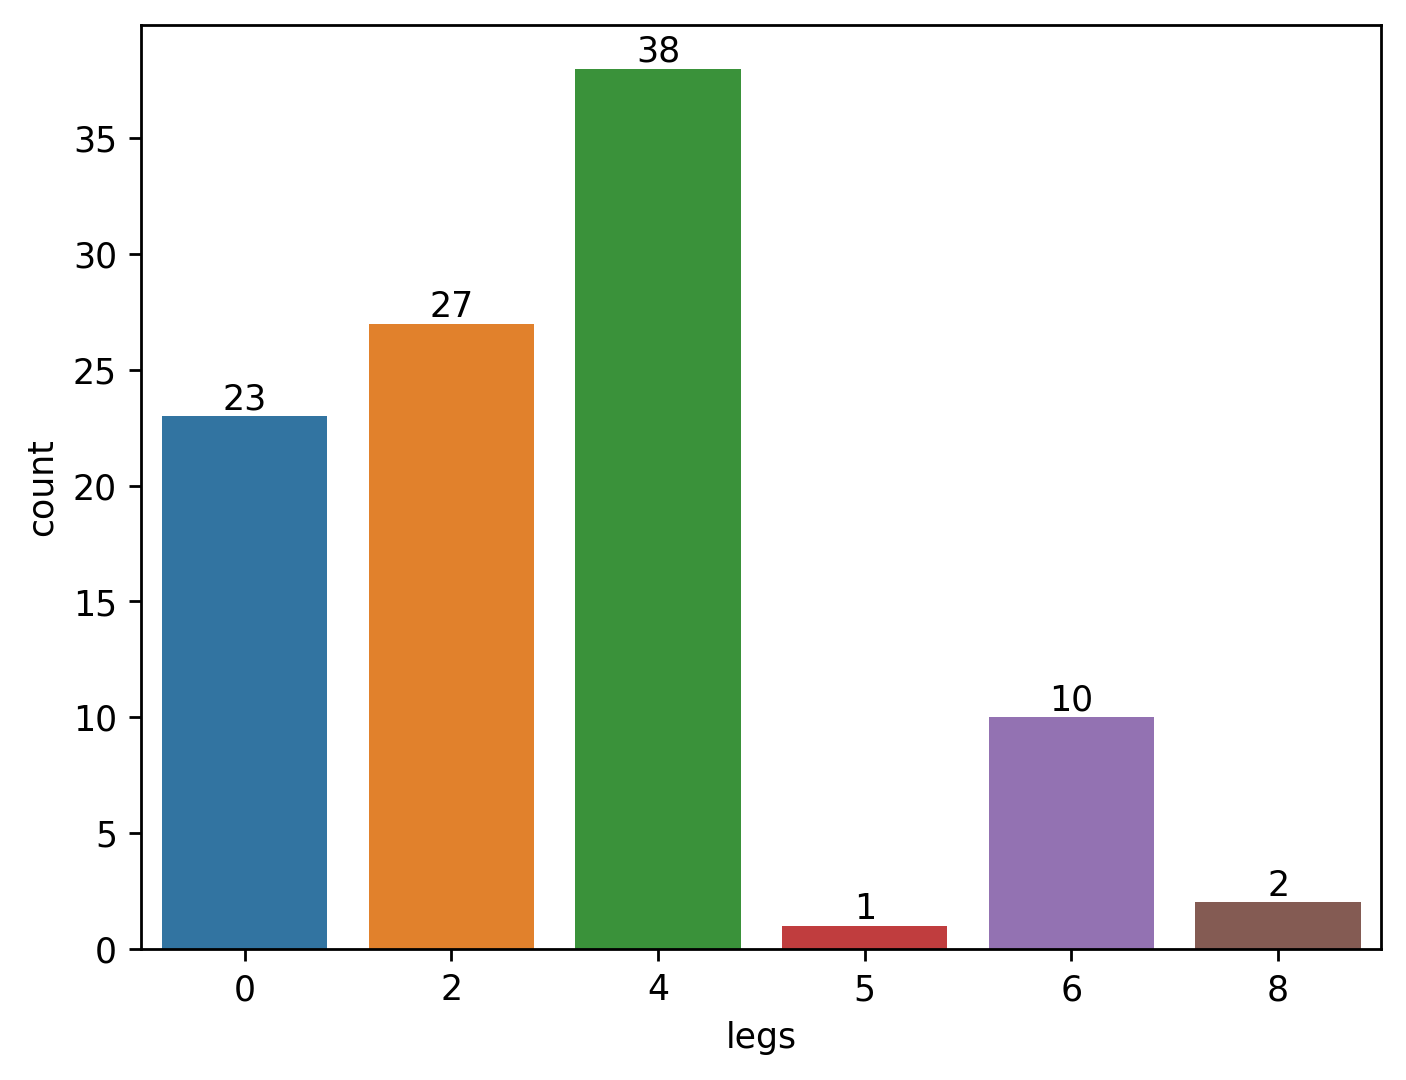

In [32]:
ax = sns.countplot('legs', data = df);
ax.bar_label(ax.containers[0]);

- 4 legs animals are more as compaired to others.

In [30]:
# Number of animals belongs to types

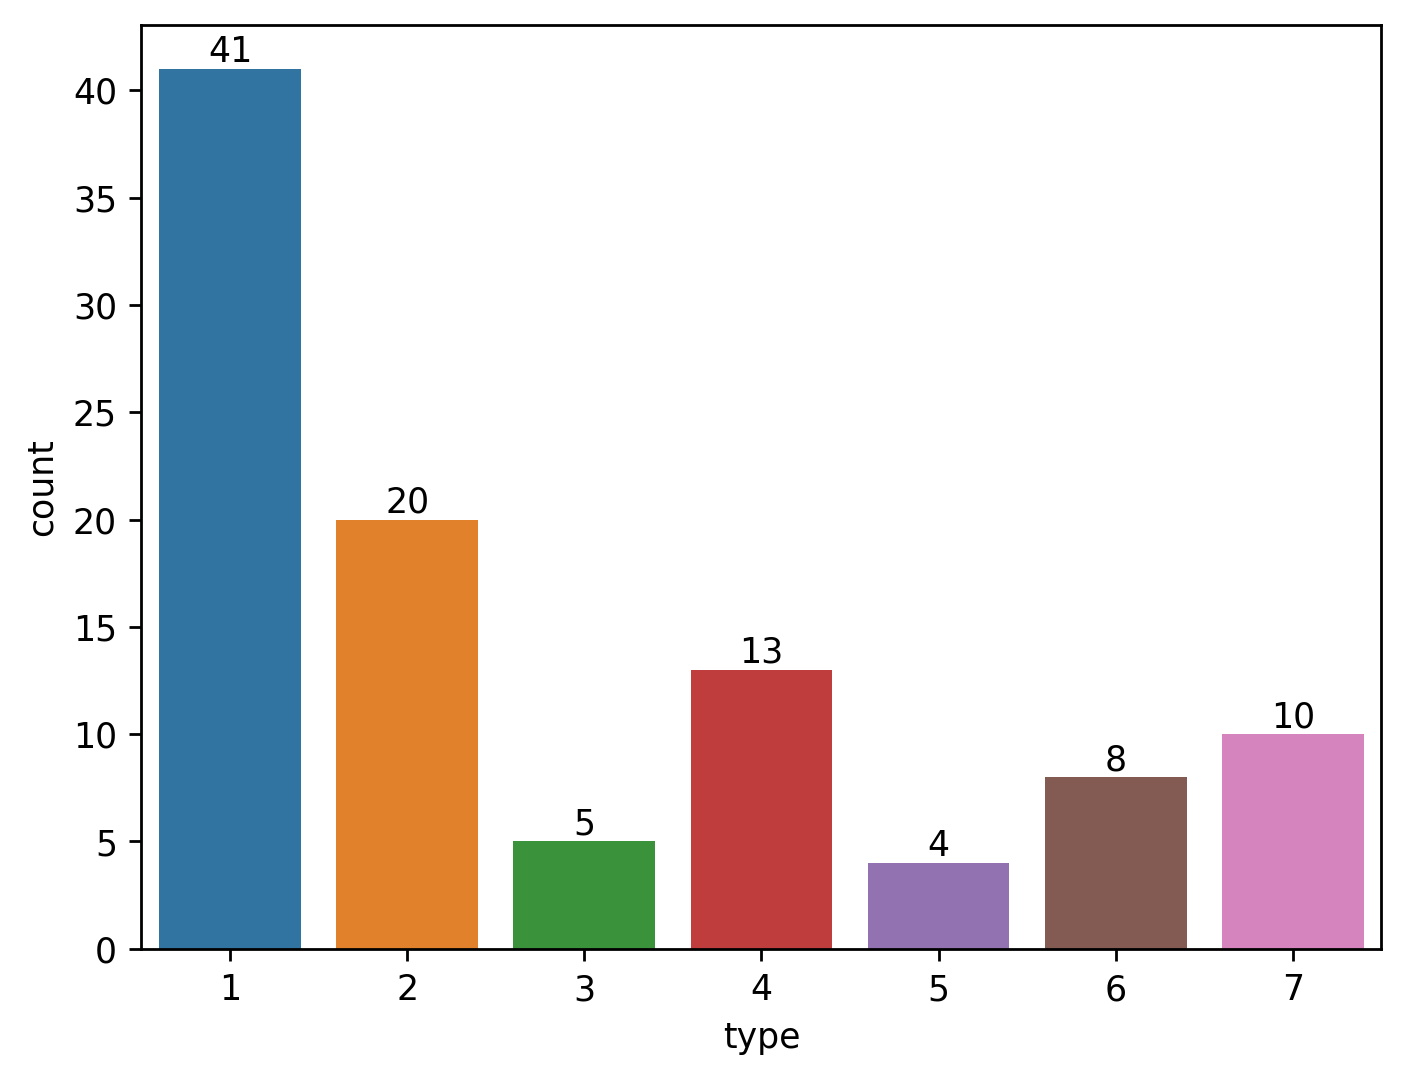

In [31]:
# Unique values present in type column

ax = sns.countplot('type', data = df);
ax.bar_label(ax.containers[0]);

- 41 animals belongs to type 1.

In [33]:
# Drop 'animal name' column

In [34]:
df.drop(columns = 'animal name', axis = 1, inplace = True)
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [35]:
# Splitting data into independent and dependent variables

In [36]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [37]:
# Checking correaltion between independent variables

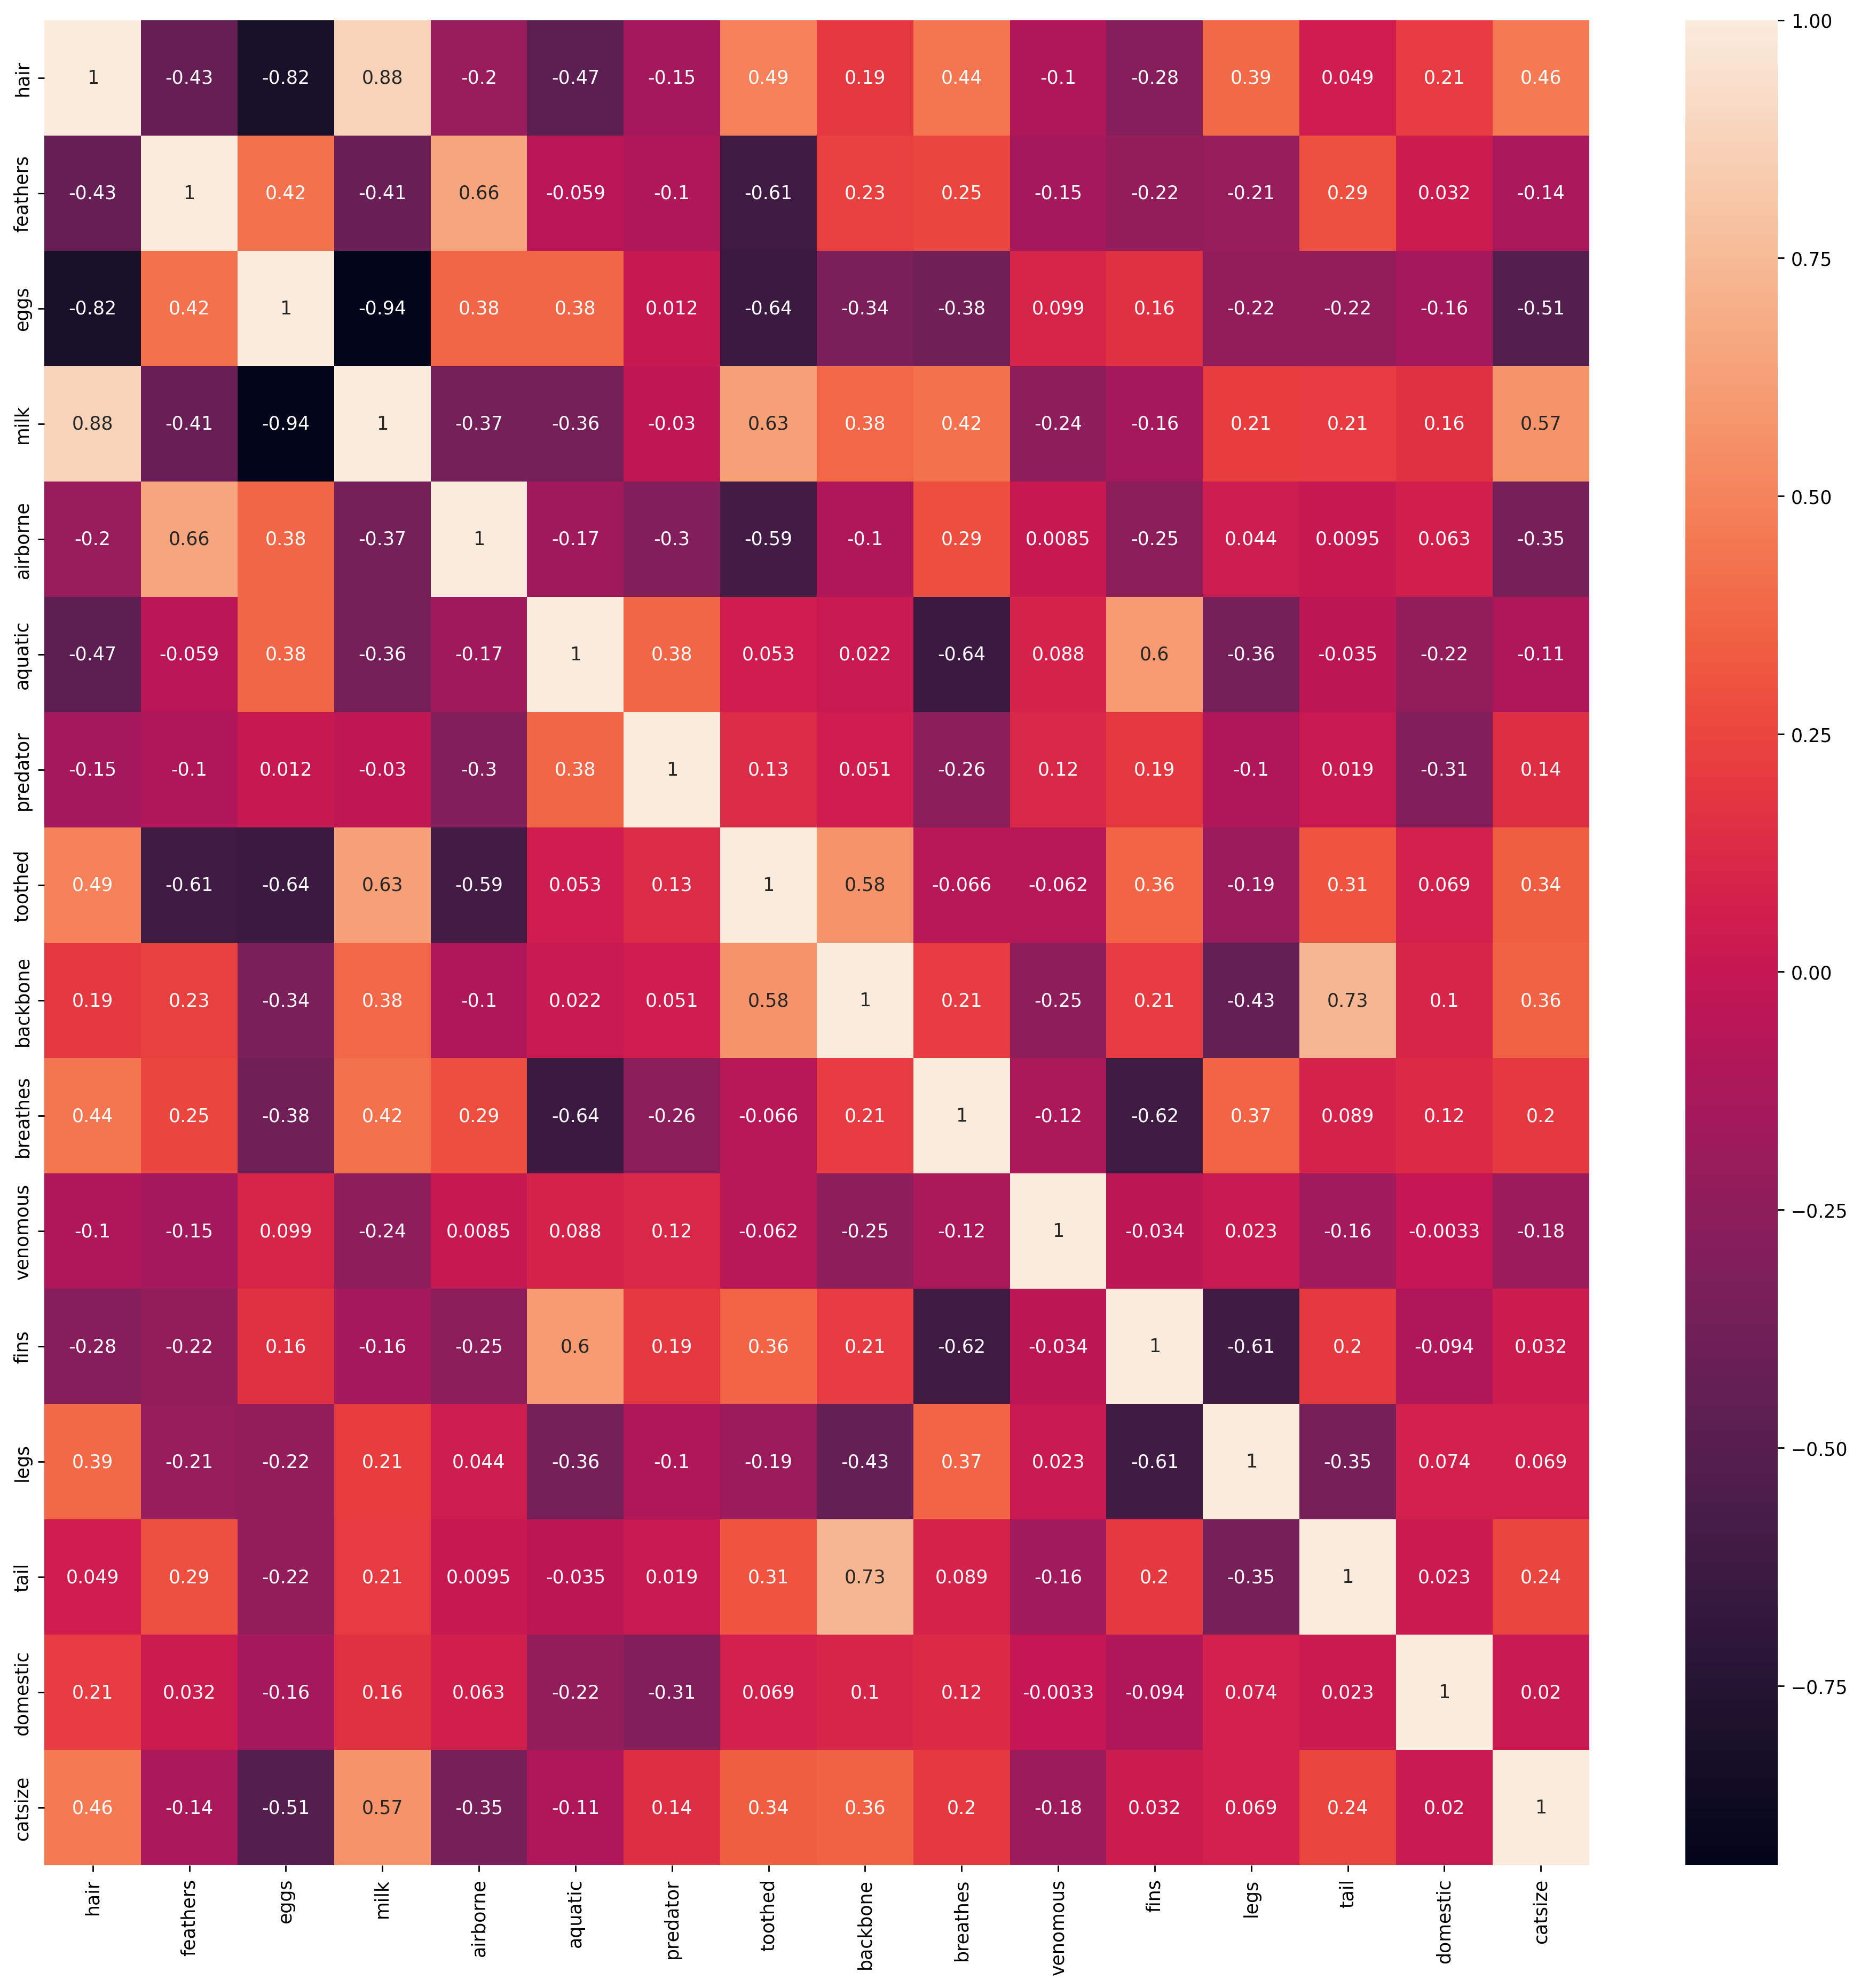

In [39]:
plt.figure(figsize = (15,15))
sns.heatmap(x.corr(), annot = True)
plt.tight_layout()

In [ ]:
# Standardization

In [40]:
sc = StandardScaler()

x = sc.fit_transform(x)
x

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [41]:
# Model building

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [44]:
# Checking accuracy of model with k = 10

In [45]:
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

print("Train Accuracy:", model.score(xtrain, ytrain))
print("Test Accuracy:", model.score(xtest, ytest))
print(classification_report(ytest, ypred))

Train Accuracy: 0.9125
Test Accuracy: 0.8095238095238095
              precision    recall  f1-score   support

           1       0.91      0.91      0.91        11
           2       0.83      1.00      0.91         5
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       1.00      0.50      0.67         2

    accuracy                           0.81        21
   macro avg       0.46      0.49      0.45        21
weighted avg       0.79      0.81      0.79        21



- Training accuracy is high as compaired to testing accuracy.
- Model shows overfitting. 

In [ ]:
# #Trying different k values to get optimal k value.

In [46]:
trainac = []
testac = []

for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

In [47]:
Accuracy = pd.DataFrame()
Accuracy['Training'] = trainac
Accuracy['Testing'] = testac
Accuracy

,Training,Testing
0,1.0000,0.952381
1,0.9500,0.857143
2,0.9500,0.904762
3,0.9625,0.952381
4,0.9625,0.857143
5,0.9500,0.904762
6,0.9250,0.904762
7,0.9250,0.904762
8,0.9125,0.809524
9,0.9125,0.809524


In [48]:
# Ploting accuracy scores to check optimal value of k

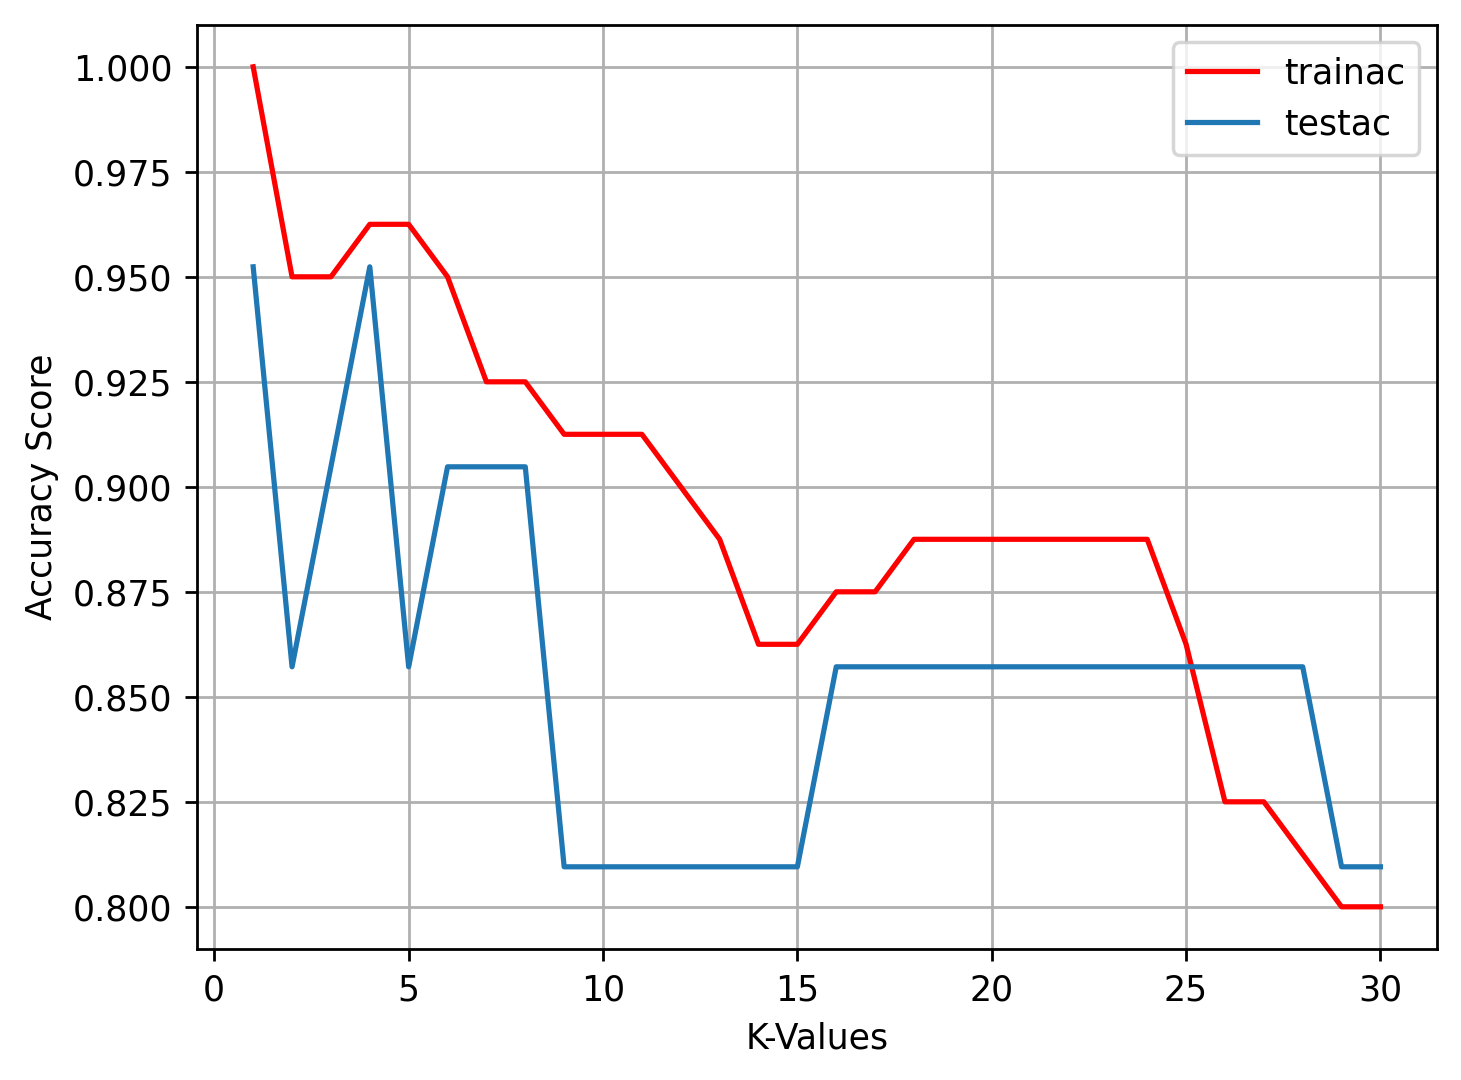

In [49]:
plt.plot(range(1,31), trainac, color = 'r', label = 'trainac')
plt.plot(range(1,31), testac, label = 'testac')
plt.xlabel('K-Values')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid()

- At 25th k-value we get similar accuracy score.

In [50]:
# Building model using k = 25.

In [51]:
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

print("Train Accuracy:", knn.score(xtrain,ytrain))
print("Test Accuracy:", knn.score(xtest,ytest))
print(classification_report(ytest,ypred))

Train Accuracy: 0.8625
Test Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           1       0.85      1.00      0.92        11
           2       0.83      1.00      0.91         5
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           7       1.00      0.50      0.67         2

    accuracy                           0.86        21
   macro avg       0.61      0.58      0.58        21
weighted avg       0.78      0.86      0.81        21



- Model accuracy = 86%

In [52]:
df1 = pd.DataFrame()
df1['Actual'] = ytest
df1['Predicted'] = ypred
df1

,Actual,Predicted
94,1,1
78,2,2
17,1,1
100,2,2
36,1,1
85,7,7
55,1,1
83,2,2
82,4,4
52,5,1


In [53]:
#Accurate predictions

df1[df1['Actual'] == df1['Predicted']]

,Actual,Predicted
94,1,1
78,2,2
17,1,1
100,2,2
36,1,1
85,7,7
55,1,1
83,2,2
82,4,4
95,2,2


In [54]:
#False predictions

df1[df1['Actual'] != df1['Predicted']]

,Actual,Predicted
52,5,1
81,7,2
80,3,1
